# Capítulo 3: Análisis exploratorio (EDA)

> **Overview**:
Este capitulo examina la distribución de la respuesta (original y log) y relaciones con predictores. Identifica correlaciones altas con calidad, área habitable y variables de tamaño; advierte colinealidades (Garage Cars vs Garage Area). Selecciona variables candidatas para el modelo base 

**Definir ruta de datos**

In [1]:
from pathlib import Path
import pandas as pd

# Definir ruta de datos relativa al capítulo (ejecutado desde book/notebooks/)
DATA_PATH = Path("../data/AmesHousing_sin_outliers.csv")
assert DATA_PATH.is_file(), f"No se encontró '{DATA_PATH}'"
print("Usando CSV:", DATA_PATH.resolve())

# Lectura canónica a reutilizar en el capítulo
df = pd.read_csv(DATA_PATH)
df.shape

Usando CSV: /workspaces/ames-housing-project/book/data/AmesHousing_sin_outliers.csv


(2768, 83)

## Distribución de la variable respuesta

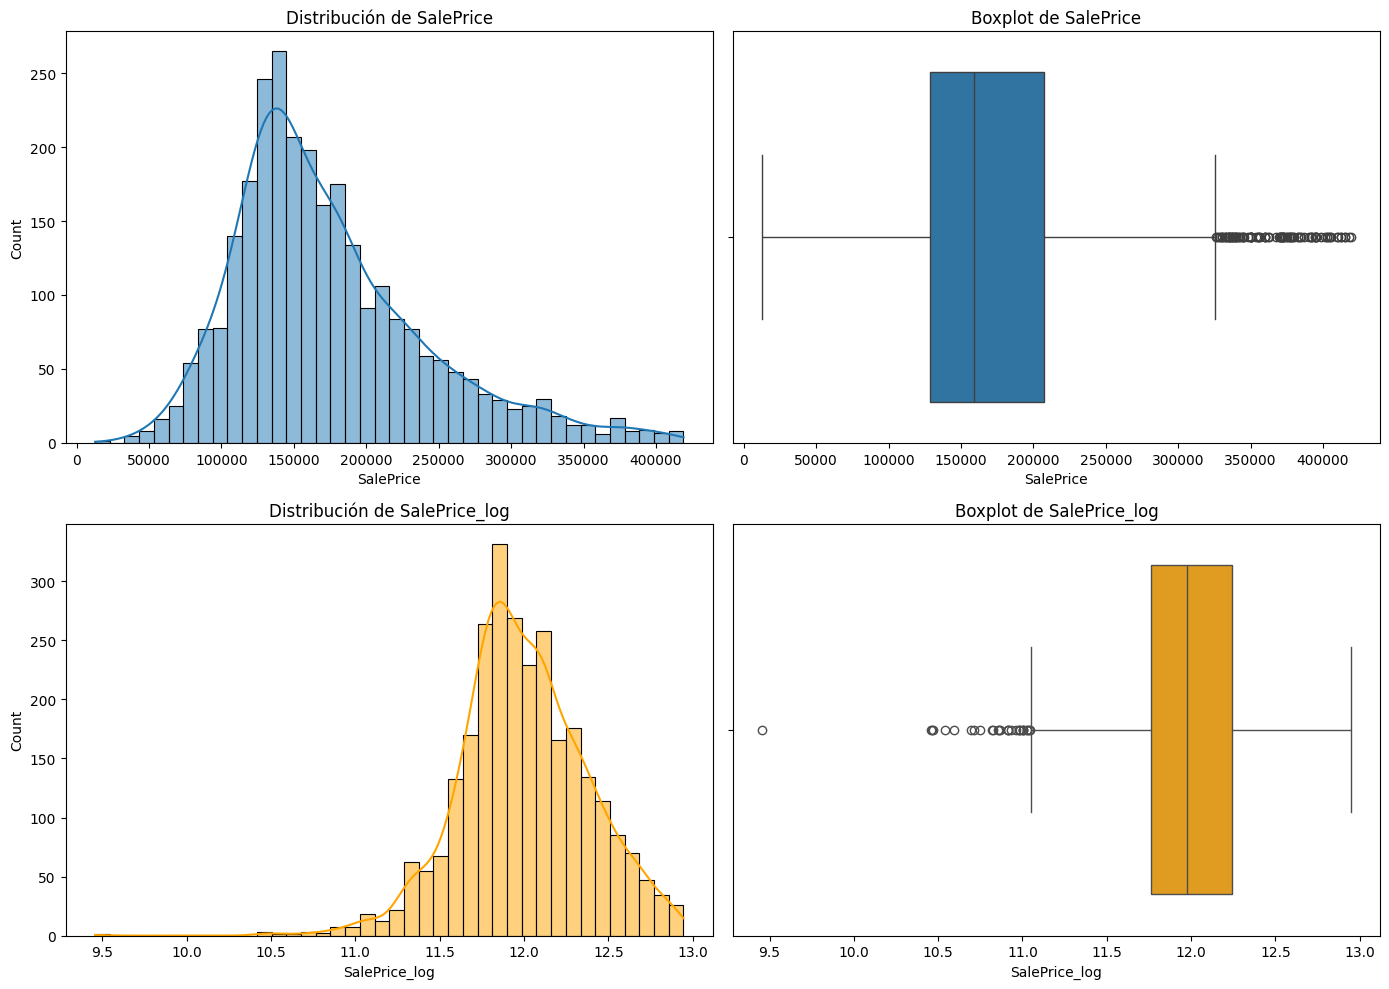

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(DATA_PATH)

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.histplot(data["SalePrice"], bins=40, kde=True)
plt.title("Distribución de SalePrice")

plt.subplot(2,2,2)
sns.boxplot(x=data["SalePrice"])
plt.title("Boxplot de SalePrice")

plt.subplot(2,2,3)
sns.histplot(data["SalePrice_log"], bins=40, kde=True, color='orange')
plt.title("Distribución de SalePrice_log")

plt.subplot(2,2,4)
sns.boxplot(x=data["SalePrice_log"], color='orange')
plt.title("Boxplot de SalePrice_log")

plt.tight_layout()
plt.show()

**Figura 3.1.1.** Histogramas y boxplots de SalePrice y SalePrice_log.

La tabla muestra la distribución de la variable de respuesta `SalePrice` antes y después de aplicar la transformación logarítmica.  

La distribución original (panel superior) presenta una **asimetría positiva marcada**, con una cola larga hacia la derecha y presencia de varios valores atípicos.  

Tras aplicar la transformación logarítmica ([Ecuación 2.3.2](#eq-2-3-2)), la variable `SalePrice_log` adquiere una dispersión más homogénea y reducción significativa de los outliers.

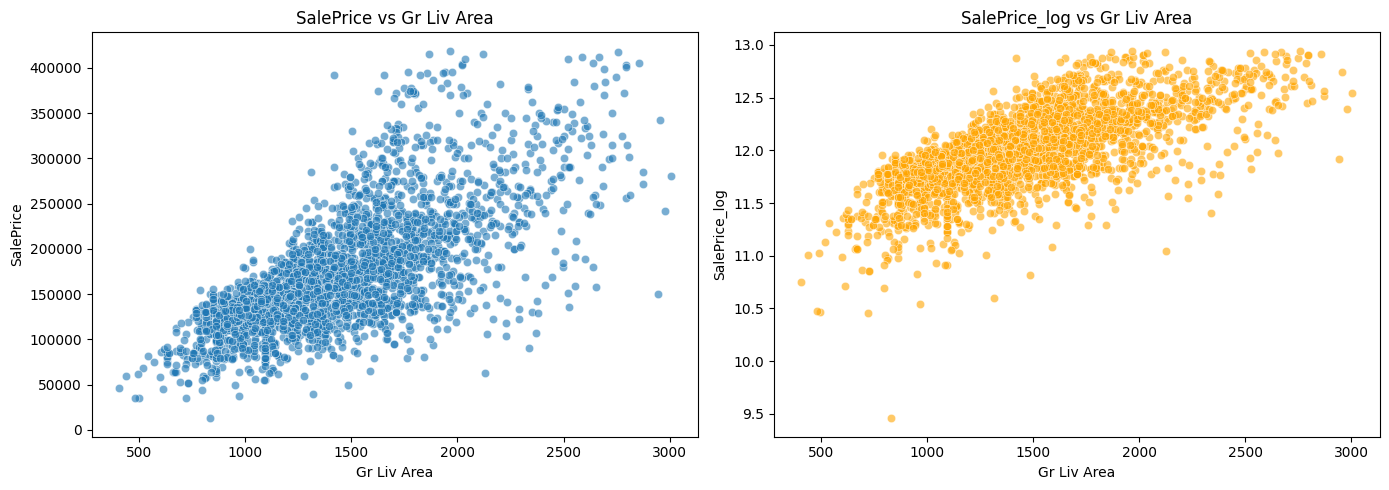

In [3]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(x=data["Gr Liv Area"], y=data["SalePrice"], alpha=0.6)
plt.title("SalePrice vs Gr Liv Area")
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")

plt.subplot(1,2,2)
sns.scatterplot(x=data["Gr Liv Area"], y=data["SalePrice_log"], alpha=0.6, color='orange')
plt.title("SalePrice_log vs Gr Liv Area")
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice_log")

plt.tight_layout()
plt.show()

**Figura 3.1.2.** Diagramas de dispersión Gr Liv Area vs. SalePrice.

Se compara la relación entre el **precio de venta** (`SalePrice`) y el **área habitable** (`Gr Liv Area`) antes y después de la transformación logarítmica ([Ecuación 2.2.2](#eq-2-2-2)) aplicada a la variable respuesta.

Inicialmente se observa una **dispersión notable en los valores altos**. Tras aplicar la transformación, el patrón muestra una **relación más lineal y estable**, reduciendo la asimetría y atenuando la influencia de valores extremos.

## Correlaciones entre variables numéricas

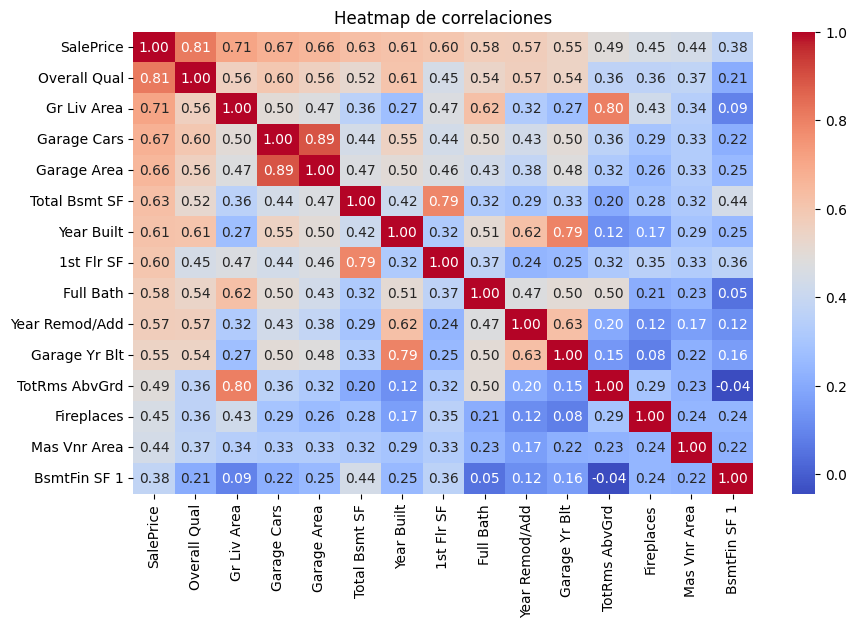

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_vars = data.select_dtypes(include=np.number).columns
num_vars = num_vars.drop("SalePrice_log")  # Excluir SalePrice_log
corr = data[num_vars].corr()

top_corr = corr["SalePrice"].sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.heatmap(corr.loc[top_corr.index, top_corr.index], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de correlaciones")
plt.show()

**Figura 3.2.1.** Heatmap de correlaciones.

In [5]:
print("Top correlaciones con SalePrice:")
display(top_corr)

Top correlaciones con SalePrice:


SalePrice         1.000000
Overall Qual      0.813010
Gr Liv Area       0.708015
Garage Cars       0.669806
Garage Area       0.655235
Total Bsmt SF     0.628824
Year Built        0.614009
1st Flr SF        0.601897
Full Bath         0.575246
Year Remod/Add    0.568559
Garage Yr Blt     0.545785
TotRms AbvGrd     0.488745
Fireplaces        0.449794
Mas Vnr Area      0.437840
BsmtFin SF 1      0.378305
Name: SalePrice, dtype: float64

**Tabla 3.2.2.** Correlaciones principales con SalePrice.

Variables como `Overall Qual`, `Gr Liv Area`, `Exter Qual` y `Bsmt Qual` tienen una correlación alta con la variable de respuesta (`SalePrice`), por lo que son candidatas a elegirse para el modelo.

Sin embargo, variables como `Garage Cars` y `Garage Area` tienen una correlación alta entre sí, de modo que puede no ser necesario incluir ambas.

## Relaciones de variables categóricas

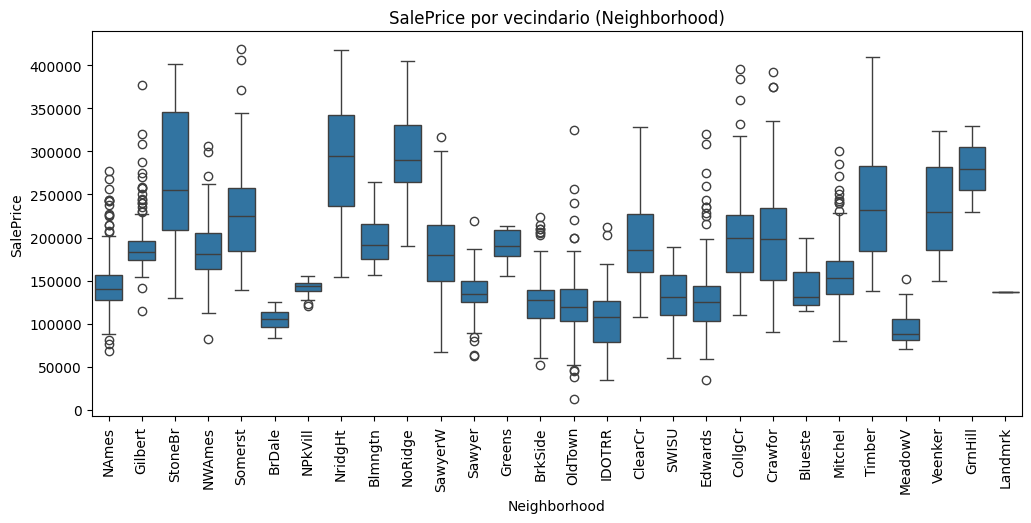

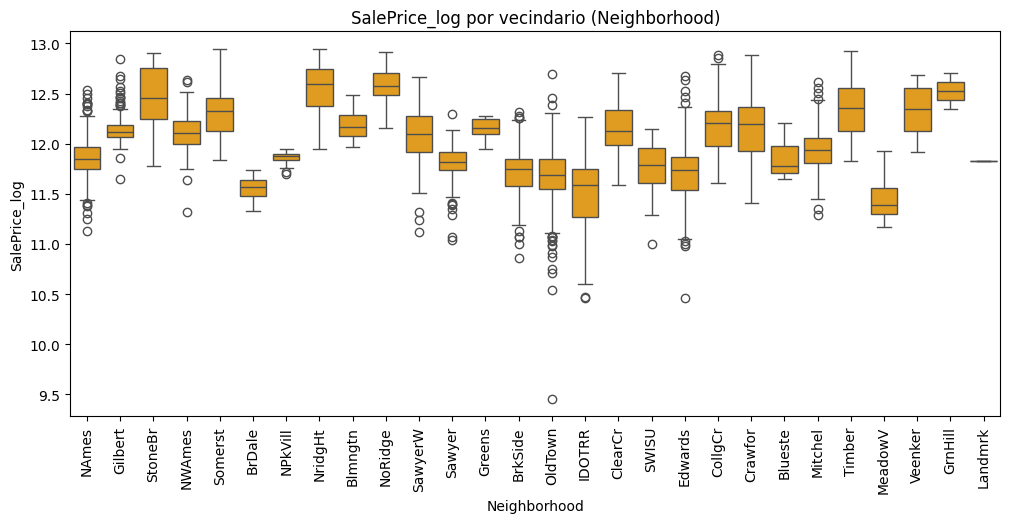

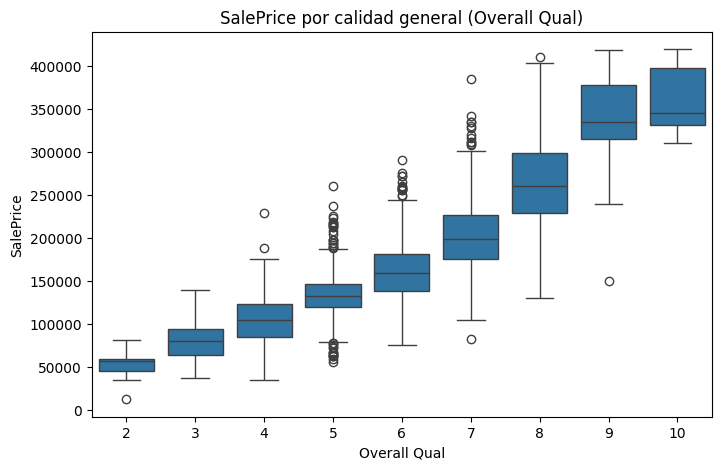

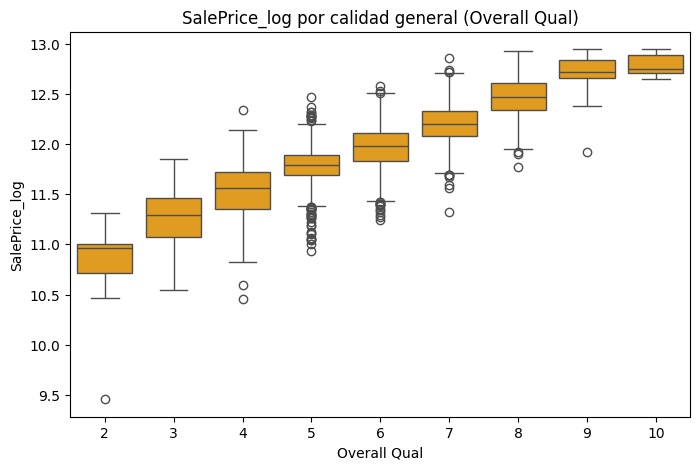

In [6]:
data = pd.read_csv(DATA_PATH)

plt.figure(figsize=(12,5))
sns.boxplot(x="Neighborhood", y="SalePrice", data=data)
plt.xticks(rotation=90)
plt.title("SalePrice por vecindario (Neighborhood)")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="Neighborhood", y="SalePrice_log", data=data, color='orange')
plt.xticks(rotation=90)
plt.title("SalePrice_log por vecindario (Neighborhood)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Overall Qual", y="SalePrice", data=data)
plt.title("SalePrice por calidad general (Overall Qual)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Overall Qual", y="SalePrice_log", data=data, color='orange')
plt.title("SalePrice_log por calidad general (Overall Qual)")
plt.show()

**Tabla 3.4.1.** Boxplots de SalePrice y SalePrice_log vs. Neighborhood y Overall Qual.

De acuerdo con los diagramas de caja y bigote, parece haber una relación entre `SalePrice` y variables categóricas como `Neighborhood` y `Overall Qual`.

Además, se notan diferencias entre la variable de respuesta original (`SalePrice`) y la transformada logarítmicamente (`SalePrice_log`).

In [7]:
vars_candidatas = [
  "Overall Qual",    # Calidad general de la casa
  "Gr Liv Area",     # Área habitable
  "Garage Cars",     # Capacidad de autos en garaje
  "Total Bsmt SF",   # Área total del sótano
  "1st Flr SF",      # Área del primer piso
  "Full Bath",       # Número de baños completos
  "Year Built",      # Año de construcción
  "Fireplaces",      # Número de chimeneas
  "Lot Area"         # Área del lote
]

print("\nVariables candidatas seleccionadas:")
for v in vars_candidatas:
    print("-", v)


Variables candidatas seleccionadas:
- Overall Qual
- Gr Liv Area
- Garage Cars
- Total Bsmt SF
- 1st Flr SF
- Full Bath
- Year Built
- Fireplaces
- Lot Area


Se eligen 9 variables predictoras, teniendo en cuenta una alta correlación con la variable de respuesta, baja correlación entre ellas (para evitar redundancia en el modelo) y sentido práctico.

> **Key takeaways**
>- La transformación log estabiliza varianza y linealiza relaciones.
>- Top correlaciones: Overall Qual, Gr Liv Area, Garage, Bsmt, Year Built.
>- Cuidar colinealidad al elegir entre variables muy relacionadas.
>-Los gráficos bivariados revelan no linealidades y motivan transformaciones previas al ajuste.
>- La detección temprana de colinealidad reduce la varianza de los estimadores y mejora la estabilidad.